In [38]:
#pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [39]:
DATADIR = "/home/weslley/Downloads/Projeto tcc/Processadas/Train"
DATADIR_VALIDACAO = "/home/weslley/Downloads/Projeto tcc/Processadas/Validacao"
DATADIR_TEST = "/home/weslley/Downloads/Projeto tcc/Processadas/Test"

CATEGORIES = ["germinou", "naogerminou"]



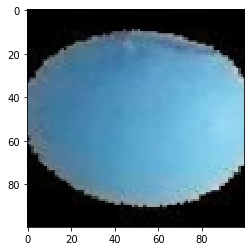

In [40]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [41]:
print(new_array.shape)

(100, 100, 3)


## Preparando a basa para treino

In [42]:

training_data  =  [] 

def create_training_data():
    for category in CATEGORIES:  # germinadas e não germinadas
        # cria caminho para as sementes
        path = os.path.join(DATADIR,category)  
        # obtém a classificação (0 ou 1). 0 = Germinou 1 = Nãogerminou
        class_num = CATEGORIES.index(category)  

         # itere sobre cada imagem por 
        for img in tqdm(os.listdir(path)):  
            try:
                # convertido a matriz 
                img_array = cv2.imread(os.path.join(path,img) ) 
                # redimensione para normalizar o tamanho dos dados 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                 # adicione isso aos nossos dados de treinamento, 
                training_data.append([new_array, class_num]) 
                 # no interesse em manter a saída limpa ... 
            except Exception as e: 
                pass
          # exceto OSError como e: 
            # print ("OSErrroBad img provavelmente", e, os.path.join ( path, img)) 
            #except Exceção como e: 
            # print ("exceção geral", e, os.path.join (path, img)) 

create_training_data()

print(len(training_data))

100%|██████████| 4357/4357 [00:07<00:00, 564.80it/s]

8612


## Preparando a basa para validação

In [43]:
validacao_data  =  [] 

def create_validacao_data():
    for category in CATEGORIES:
        # cria caminho para as sementes
        path = os.path.join(DATADIR_VALIDACAO,category)  
        # obtém a classificação (0 ou 1). 0 = germinou 1 = NaoGerminou 
        class_num = CATEGORIES.index(category)  

         # itere sobre cada imagem por 
        for img in tqdm(os.listdir(path)):  
            try:
                # convertido a matriz 
                img_array = cv2.imread(os.path.join(path,img) ) 
                # redimensione para normalizar o tamanho dos dados 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                 # adicione isso aos nossos dados de treinamento, 
                validacao_data.append([new_array, class_num]) 
                 # no interesse em manter a saída limpa ... 
            except Exception as e: 
                pass
          # exceto OSError como e: 
            # print ("OSErrroBad img provavelmente", e, os.path.join ( path, img)) 
            #except Exceção como e: 
            # print ("exceção geral", e, os.path.join (path, img)) 

create_validacao_data()

print(len(validacao_data))

100%|██████████| 489/489 [00:00<00:00, 501.95it/s]

974


## Preparando a basa para teste

In [44]:
test_data  =  [] 

def create_test_data():
    for category in CATEGORIES:  
        # cria caminho para sementes
        path = os.path.join(DATADIR_TEST,category)  
        # obtém a classificação (0 ou 1). 0 = germinou 1 = Naogerminou
        class_num = CATEGORIES.index(category)  

         # itere sobre cada imagem por 
        for img in tqdm(os.listdir(path)):  
            try:
                # convertido a matriz 
                img_array = cv2.imread(os.path.join(path,img) ) 
                # redimensione para normalizar o tamanho dos dados 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                 # adicione isso aos nossos dados de treinamento, 
                test_data.append([new_array, class_num]) 
                 # no interesse em manter a saída limpa ... 
            except Exception as e: 
                pass
          # exceto OSError como e: 
            # print ("OSErrroBad img provavelmente", e, os.path.join ( path, img)) 
            #except Exceção como e: 
            # print ("exceção geral", e, os.path.join (path, img)) 

create_test_data()

print(len(test_data))

100%|██████████| 122/122 [00:00<00:00, 645.66it/s]

242


## Embaralhando as imagens
No momento, nossos dados são apenas todas as sementes que germinaram, depois todas as que não germinaram. Isso geralmente acabará causando problemas, pois, inicialmente, o classificador aprenderá a prever sempre as sementes que germinaram.

In [45]:
import random

random.shuffle(training_data)
random.shuffle(validacao_data)
random.shuffle(test_data)

Nossa training_dataé uma lista, o que significa que é mutável, por isso agora está bem embaralhada. Podemos confirmar isso repetindo algumas das amostras iniciais e imprimindo a classe.

In [46]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
0
1
0
1
0


Ótimo, nós temos os exemplos bem misturadas! Hora de fazer o nosso modelo!



In [47]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y= np.array(y)

In [48]:
print(y[6])

1


In [49]:
X_val = []
y_val = []

for features,label in validacao_data:
    X_val.append(features)
    y_val.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_val= X_val/255.0


In [50]:
print(y_val[1])

0


In [51]:
X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_test=X_test/255.0

In [52]:
print((y_test))

[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]


Salvando os dados, para que não precisemos continuar calculando-os sempre que quisermos usar o modelo de rede neural:



In [54]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Poderia ter salvo os dados de validação e teste
### Sempre podemos carregá-lo em nosso script atual, ou um totalmente novo, fazendo:



In [55]:
import pickle

pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
b = pickle.load(pickle_in)
y = np.array(b)

X = X/255.0


In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [30]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [56]:

#early_stopping= tf.keras.callbacks.EarlyStopping(patience=2)
model.fit(X, y, batch_size=100, epochs=10,validation_data=(X_val,y_val),verbose=2)
 

Train on 8612 samples, validate on 974 samples
Epoch 1/10
8612/8612 - 78s - loss: 0.5695 - acc: 0.7015 - val_loss: 0.4707 - val_acc: 0.7977
Epoch 2/10
8612/8612 - 77s - loss: 0.4414 - acc: 0.7933 - val_loss: 0.4293 - val_acc: 0.7936
Epoch 3/10
8612/8612 - 74s - loss: 0.3697 - acc: 0.8269 - val_loss: 0.3891 - val_acc: 0.8172
Epoch 4/10
8612/8612 - 75s - loss: 0.3300 - acc: 0.8458 - val_loss: 0.3986 - val_acc: 0.8080
Epoch 5/10
8612/8612 - 75s - loss: 0.2874 - acc: 0.8705 - val_loss: 0.3411 - val_acc: 0.8409
Epoch 6/10
8612/8612 - 75s - loss: 0.2436 - acc: 0.8924 - val_loss: 0.3080 - val_acc: 0.8655
Epoch 7/10
8612/8612 - 76s - loss: 0.2236 - acc: 0.9047 - val_loss: 0.2945 - val_acc: 0.8573
Epoch 8/10
8612/8612 - 74s - loss: 0.1861 - acc: 0.9192 - val_loss: 0.3341 - val_acc: 0.8542
Epoch 9/10
8612/8612 - 74s - loss: 0.1588 - acc: 0.9353 - val_loss: 0.2577 - val_acc: 0.8932
Epoch 10/10
8612/8612 - 75s - loss: 0.1527 - acc: 0.9357 - val_loss: 0.2415 - val_acc: 0.8932


In [57]:
print(y_test[24])

1


In [58]:
test_loss, test_accuracy=model.evaluate(X_test,y_test)

242/242 [==============================] - 1s 6ms/sample - loss: 0.2607 - acc: 0.9050


In [59]:
classe = model.predict(X_test)

In [60]:
print(classe[24])

[9.5959747e-04 9.9904042e-01]
